In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [399]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [400]:
df = pd.read_csv('Mapping.csv')
df

,Unnamed: 0,emoticons,number
0,0,😜,0
1,1,📸,1
2,2,😍,2
3,3,😂,3
4,4,😉,4
5,5,🎄,5
6,6,📷,6
7,7,🔥,7
8,8,😘,8
9,9,❤,9


In [401]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,emoticons,number
0,😜,0
1,📸,1
2,😍,2
3,😂,3
4,😉,4


<Axes: xlabel='number', ylabel='count'>

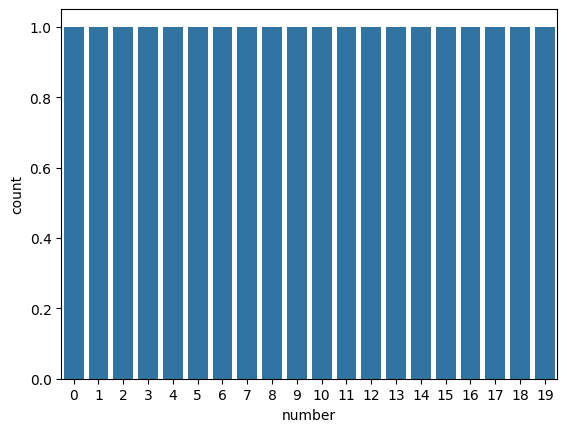

In [402]:
sns.countplot(x = df['number'])

In [404]:
train = pd.read_csv('Train.csv')
train.head()

,Unnamed: 0,TEXT,Label
0,0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,2,Been friends since 7th grade. Look at us now w...,2
3,3,This is what it looks like when someone loves ...,3
4,4,RT @user this white family was invited to a Bl...,3


In [405]:
train.drop('Unnamed: 0', axis=1, inplace=True)
train.head()

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3


In [406]:
train.shape

(70000, 2)

In [407]:
train.isnull().sum()

TEXT     0
Label    0
dtype: int64

In [408]:
train['Label'].value_counts()

Label
9     15091
2      7076
3      6842
7      4363
15     3843
13     3250
16     2832
17     2751
1      2592
11     2434
14     2342
6      2083
8      1992
5      1977
12     1909
4      1878
19     1745
18     1722
10     1721
0      1557
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

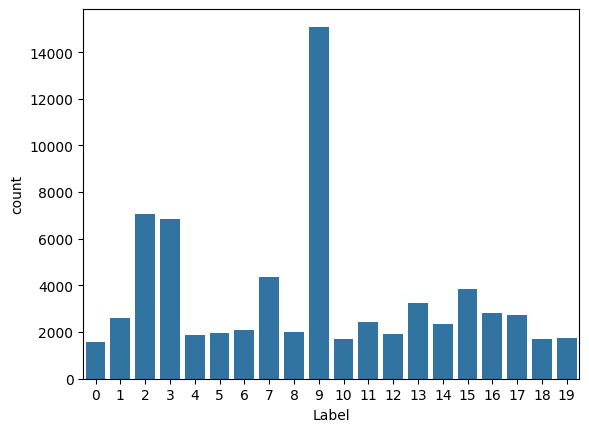

In [409]:
sns.countplot(x = train['Label'])

In [410]:
train = train.sample(frac = 1)
number = train.loc[train['Label'] == 9][:7076]
train = train[train.Label != 9]
train = pd.concat([train, number])
train = train.sample(frac = 1)
train.reset_index(drop = True, inplace = True)
train

,TEXT,Label
0,I love the #perks of using my #Smiths (#Kroger...,17
1,"Ray this...Yance that... @ Pasadena, California\n",3
2,My daughter was soooo happy to see her #bigbro...,15
3,Birthday dinner for my girl.. #familytime #qua...,2
4,️good morning @ Bourbonnais Biggby Coffee\n,12
...,...,...
61980,The only steak salad recipe you will ever need...,14
61981,Feeling like Blair in highschool but with much...,7
61982,@ The Ink Gallery STL\n,13
61983,This one is going to be insane!!!!!! Watch it ...,7


In [411]:
train['Label'].value_counts()

Label
2     7076
9     7076
3     6842
7     4363
15    3843
13    3250
16    2832
17    2751
1     2592
11    2434
14    2342
6     2083
8     1992
5     1977
12    1909
4     1878
19    1745
18    1722
10    1721
0     1557
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

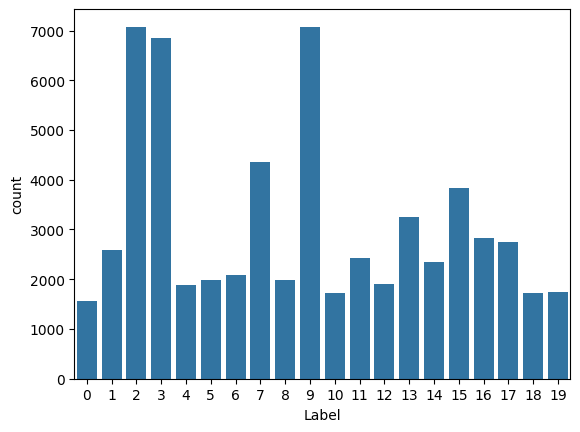

In [412]:
sns.countplot(x = train['Label'])

In [413]:
Test = pd.read_csv('Test.csv')
Test.head()

,Unnamed: 0,id,TEXT
0,0,0,Thought this was cool...#Repost (get_repost)・・...
1,1,1,Happy 4th! Corte madera parade. #everytownusa ...
2,2,2,Luv. Or at least something close to it. @ Unio...
3,3,3,There's a slice of pie under that whipped crea...
4,5,5,#thankyou for your thank you We adore you both...


In [414]:
Test.drop(['Unnamed: 0','id'], axis=1, inplace=True)
Test.head()

,TEXT
0,Thought this was cool...#Repost (get_repost)・・...
1,Happy 4th! Corte madera parade. #everytownusa ...
2,Luv. Or at least something close to it. @ Unio...
3,There's a slice of pie under that whipped crea...
4,#thankyou for your thank you We adore you both...


In [415]:
Test.isnull().sum()

TEXT    0
dtype: int64

In [370]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25958 entries, 0 to 25957
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TEXT    25958 non-null  object
dtypes: object(1)
memory usage: 202.9+ KB


In [417]:
data_merge = pd.merge(train, df, left_on = 'Label', right_on = 'number', how = 'left')
data_merge.drop(['Label','number'], axis= 1, inplace = True)
data_merge

,TEXT,emoticons
0,I love the #perks of using my #Smiths (#Kroger...,😊
1,"Ray this...Yance that... @ Pasadena, California\n",😂
2,My daughter was soooo happy to see her #bigbro...,💕
3,Birthday dinner for my girl.. #familytime #qua...,😍
4,️good morning @ Bourbonnais Biggby Coffee\n,☀
...,...,...
61980,The only steak salad recipe you will ever need...,💙
61981,Feeling like Blair in highschool but with much...,🔥
61982,@ The Ink Gallery STL\n,✨
61983,This one is going to be insane!!!!!! Watch it ...,🔥


In [418]:
stemm = SnowballStemmer('english')
sw = stopwords.words('english')

In [419]:
train_text = train.TEXT
train_text

0        I love the #perks of using my #Smiths (#Kroger...
1        Ray this...Yance that... @ Pasadena, California\n
2        My daughter was soooo happy to see her #bigbro...
3        Birthday dinner for my girl.. #familytime #qua...
4              ️good morning @ Bourbonnais Biggby Coffee\n
                               ...                        
61980    The only steak salad recipe you will ever need...
61981    Feeling like Blair in highschool but with much...
61982                              @ The Ink Gallery STL\n
61983    This one is going to be insane!!!!!! Watch it ...
61984    Boni made me sing. Such an honor to play for h...
Name: TEXT, Length: 61985, dtype: object

In [420]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('[^a-z0-9]+', ' ',text)
    text=[stemm.stem(word) for word in text.split(' ') if (word not in sw)and len(word)>=3]
    text=' '.join(text)
    return text
    train_text = train_text.apply(clean_text)


In [421]:
Test_text = Test.TEXT
Test_text

0        Thought this was cool...#Repost (get_repost)・・...
1        Happy 4th! Corte madera parade. #everytownusa ...
2        Luv. Or at least something close to it. @ Unio...
3        There's a slice of pie under that whipped crea...
4        #thankyou for your thank you We adore you both...
                               ...                        
25953    Rest In Peace, Nana. thanks for playing cards ...
25954    I jus wan EAT #chowtime #swt30 @ Hartford, Con...
25955    Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956    Best Snow-cone I've EVER had!!! #bahamabucks #...
25957    You making my life better is just part of your...
Name: TEXT, Length: 25958, dtype: object

In [422]:
Test_text = Test_text.apply(clean_text)
Test_text

0        thought cool repost get repost colorview shay ...
1        happi 4th cort madera parad everytownusa meric...
2        luv least someth close union hill richmond vir...
3                  slice pie whip cream houseofpi hous pie
4                thankyou thank ador plan moreeee host wed
                               ...                        
25953     rest peac nana thank play card lynn massachusett
25954       jus wan eat chowtim swt30 hartford connecticut
25955    play bloon supermonkey bloonsupermonkey2 bloon...
25956        best snow cone ever bahamabuck youhavetotryit
25957                          make life better part bless
Name: TEXT, Length: 25958, dtype: object

In [423]:
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_text)
X_test = tfidf_vectorizer.transform(Test_text)
print(X_train.shape)
print(X_test.shape)

(61985, 70140)
(25958, 70140)


In [424]:
print(X_test)

  (0, 62425)	0.383544114198608
  (0, 55027)	0.5487288299762894
  (0, 51426)	0.6097288044457623
  (0, 24753)	0.25838158996719324
  (0, 14564)	0.3365417100622515
  (1, 40144)	0.5132185318817764
  (1, 38295)	0.7322043304822755
  (1, 1236)	0.44775390222321554
  (2, 66093)	0.33016244456495963
  (2, 64921)	0.3720195630495313
  (2, 51827)	0.42227559188298747
  (2, 38000)	0.4017600824041704
  (2, 35747)	0.38913799352889206
  (2, 28499)	0.35026990770276134
  (2, 13520)	0.37249024060235414
  (3, 67704)	0.4009999689567224
  (3, 56330)	0.446386614466539
  (3, 47856)	0.7318906710031291
  (3, 15145)	0.3229149439409684
  (4, 67049)	0.5082611202662642
  (4, 61282)	0.47600111022878583
  (4, 61237)	0.27307976070646955
  (4, 48242)	0.4512896454208352
  (4, 29255)	0.486681288848338
  (5, 65945)	0.29579592067036925
  :	:
  (25952, 21757)	0.28433801611480974
  (25952, 6636)	0.32731086324690506
  (25952, 5730)	0.35332716063627995
  (25953, 61237)	0.2625172790245601
  (25953, 51532)	0.39622305983754663
  (259

In [425]:
y_train = train['Label']
y_train

0        17
1         3
2        15
3         2
4        12
         ..
61980    14
61981     7
61982    13
61983     7
61984     0
Name: Label, Length: 61985, dtype: int64

In [431]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=30, random_state=50)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=30, random_state=50)

In [433]:
y_pred = rf.predict(X_test)
y_pred

array([16, 11,  3, ...,  2,  9,  9])

In [434]:
output = pd.DataFrame({'TEXT':Test_text, 'Label':y_pred})
df_output = pd.merge(output, df, left_on = 'Label', right_on = 'number', how = 'left')
result = df_output.drop(['number', 'Label' ], axis = 1)
result

,TEXT,emoticons
0,thought cool repost get repost colorview shay ...,😎
1,happi 4th cort madera parad everytownusa meric...,🇺🇸
2,luv least someth close union hill richmond vir...,😂
3,slice pie whip cream houseofpi hous pie,😍
4,thankyou thank ador plan moreeee host wed,❤
...,...,...
25953,rest peac nana thank play card lynn massachusett,❤
25954,jus wan eat chowtim swt30 hartford connecticut,😂
25955,play bloon supermonkey bloonsupermonkey2 bloon...,😍
25956,best snow cone ever bahamabuck youhavetotryit,❤


In [440]:
pred = rf.predict(X_test[22576])
num = pred[0]
emoji = df.loc[(df['number']) == num].values[0][0]
emoji

'😍'